# Clustering

# 1. Metrics

In this lab, you will use and interpret clustering metrics on the [Iris dataset](https://fr.wikipedia.org/wiki/Iris_de_Fisher). Feel free to use any dataset of your choice.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tabulate import tabulate

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans

In [3]:
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, f1_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import precision_recall_fscore_support

## Data

In [4]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target
feature_names = iris.feature_names
label_names = iris.target_names

In [5]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
print(label_names)

['setosa' 'versicolor' 'virginica']


In [7]:
df_iris = pd.DataFrame(data= np.c_[X, y],
                       columns= iris['feature_names'] + ['target'])

df_iris['target'] = df_iris['target'].astype(int)

df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
print("X shape : ", X.shape)
print("Number of observations : ", X.shape[0])
print("Number of features : ", X.shape[1])
print("Number of classes : ", len(np.unique(y)))

X shape :  (150, 4)
Number of observations :  150
Number of features :  4
Number of classes :  3


In [9]:
for i in range(len(np.unique(y))):
    print("Classe "+str(np.unique(y, return_counts=True)[0][i])+" : "+str(np.unique(y, return_counts=True)[1][i]))

Classe 0 : 50
Classe 1 : 50
Classe 2 : 50


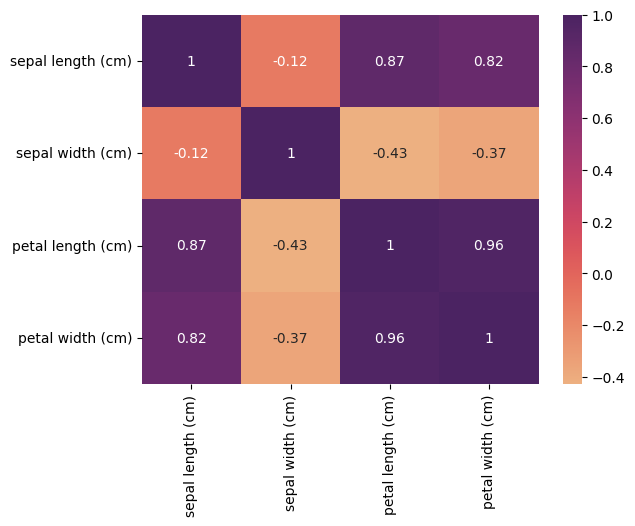

In [10]:
sns.heatmap(df_iris.iloc[:,:4].corr(), annot=True, annot_kws={"size": 10}, cmap='flare')
plt.show()

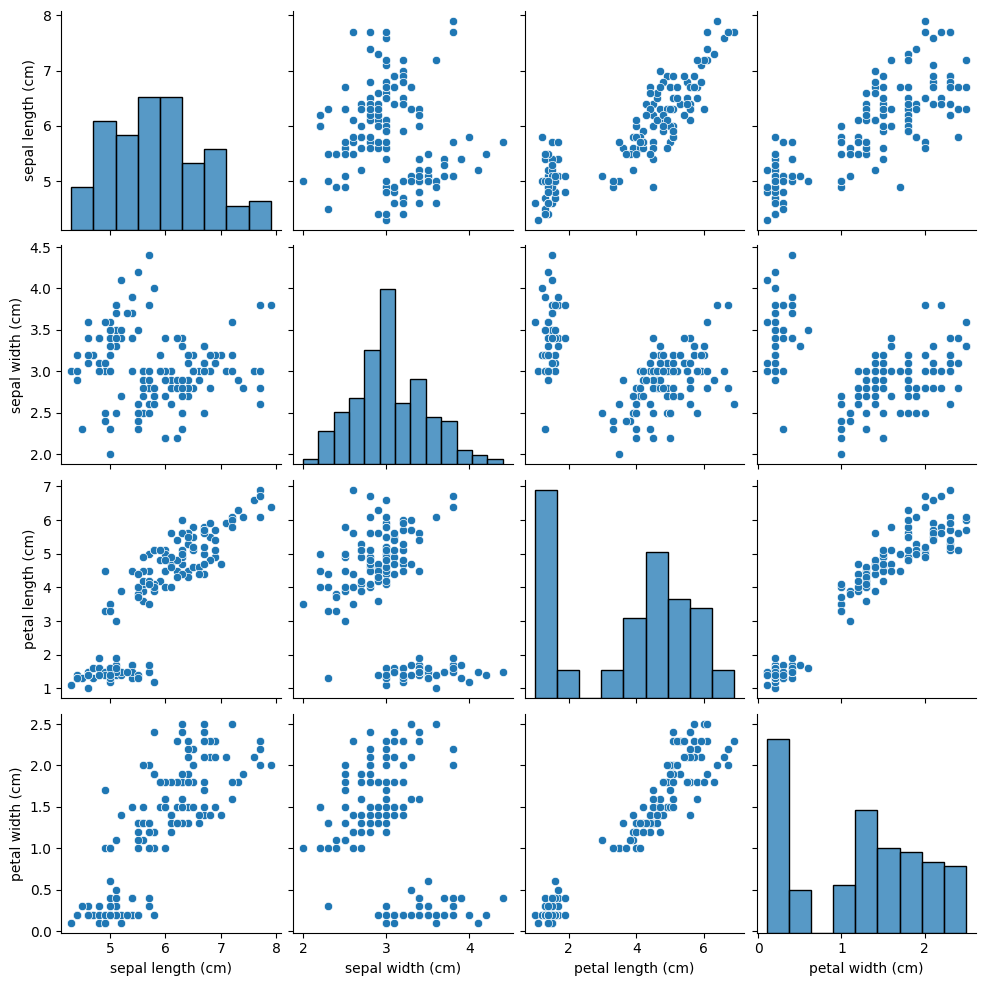

In [11]:
sns.pairplot(df_iris.iloc[:,:4])
plt.show()

In [12]:
def show_data(X, y, features=[0, 1], feature_names=feature_names):
    '''Display the samples in 2D'''
    plt.figure(figsize=(5,5))
    for label in set(y):
        plt.scatter(X[y == label, features[0]], X[y == label, features[1]])
    plt.xlabel(feature_names[features[0]])
    plt.ylabel(feature_names[features[1]])
    plt.show()

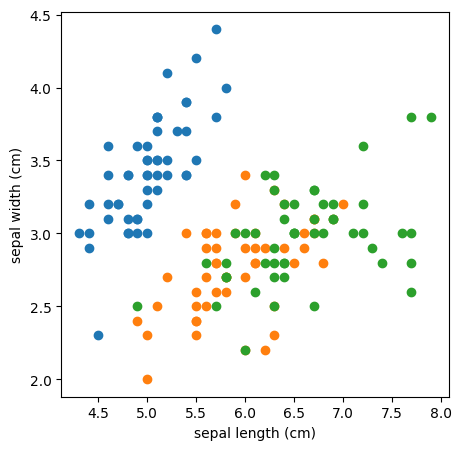

In [13]:
show_data(X, y, [0, 1])

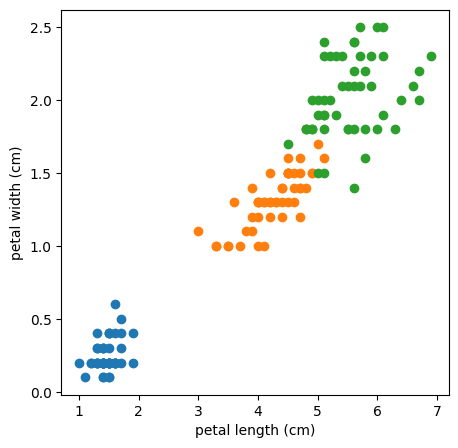

In [14]:
show_data(X, y, [2, 3])

## K-means

Let's apply k-means and display the clusters.

In [15]:
km = KMeans(n_clusters=3, n_init=10)
labels = km.fit_predict(X)

In [16]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [17]:
# Reorder the labels
cm = contingency_matrix(y, labels)
cm_argmax = cm.argmax(axis=0)
labels = np.array([cm_argmax[i] for i in labels])

In [18]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

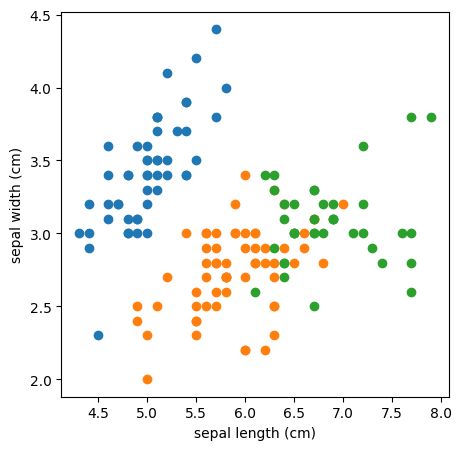

In [19]:
show_data(X, labels, [0, 1])

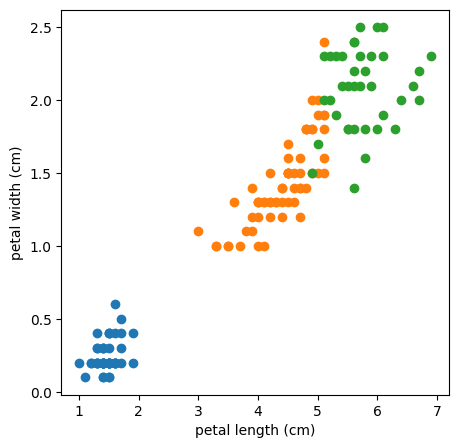

In [20]:
show_data(X, labels, [2, 3])

## Silhouette

We first try to assess the quality of the clustering using the silhouette score. Here we do not use the ground-truth labels.

## To do

* Compute the silhouette of each sample.
* What are the 3 samples of lowest silhouette? What are their clusters?
* Display the silhouette distribution of each cluster using Seaborn (check ``sns.kdeplot``).
* What are the worst clusters in terms of silhouette?
* Compute the average silhouette when the number of clusters grows from 2 to 6.<br> 
What is the optimal number of clusters in terms of average silhouette?

In [21]:
# Silhouette scores
df_silhouette = pd.DataFrame(data= np.c_[X, y, labels, silhouette_samples(X, labels)],
                             columns= iris['feature_names'] + ['target'] + ['cluster'] + ['silhouette'])

df_silhouette['target'] = df_silhouette['target'].astype(int)
df_silhouette['cluster'] = df_silhouette['cluster'].astype(int)

df_silhouette = df_silhouette.sort_values('silhouette', ascending=False)

df_silhouette

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,silhouette
7,5.0,3.4,1.5,0.2,0,0,0.853905
0,5.1,3.5,1.4,0.2,0,0,0.852955
49,5.0,3.3,1.4,0.2,0,0,0.852098
17,5.1,3.5,1.4,0.3,0,0,0.851018
39,5.1,3.4,1.5,0.2,0,0,0.850332
...,...,...,...,...,...,...,...
146,6.3,2.5,5.0,1.9,2,1,0.104171
52,6.9,3.1,4.9,1.5,1,2,0.053401
134,6.1,2.6,5.6,1.4,2,2,0.053286
50,7.0,3.2,4.7,1.4,1,1,0.026722


The 3 samples of lowest silhouette are 114, 50, 134. 114 and 50 belong to cluster 2, whereas 134 belongs to cluster 1.

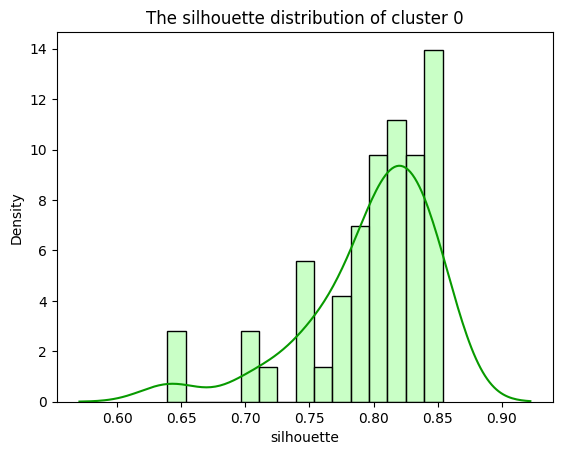

In [22]:
silhouette_0 = df_silhouette.loc[df_silhouette['cluster']==0, 'silhouette']

sns.histplot(silhouette_0, color='#B7FFB3', bins=15, stat='density')
sns.kdeplot(silhouette_0, color='#089A00')

plt.title('The silhouette distribution of cluster 0')

plt.show()

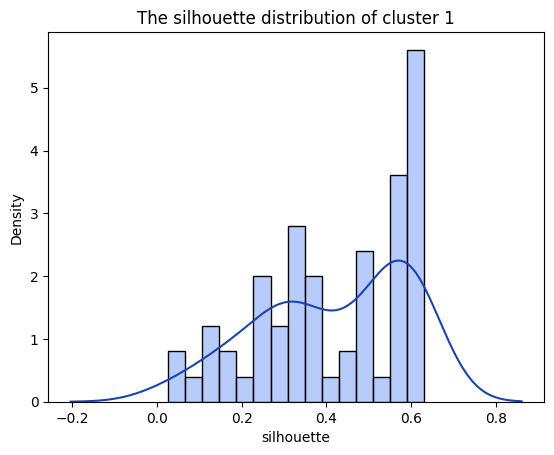

In [23]:
silhouette_1 = df_silhouette.loc[df_silhouette['cluster']==1, 'silhouette']

sns.histplot(silhouette_1, color='#A1BBFA', bins=15, stat='density')
sns.kdeplot(silhouette_1, color='#1A45AF')

plt.title('The silhouette distribution of cluster 1')

plt.show()

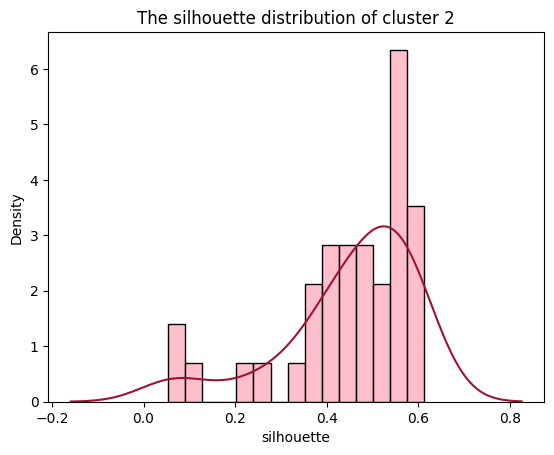

In [24]:
silhouette_2 = df_silhouette.loc[df_silhouette['cluster']==2, 'silhouette']

sns.histplot(silhouette_2, color='#FFA8BC', bins=15, stat='density')
sns.kdeplot(silhouette_2, color='#9D1433')

plt.title('The silhouette distribution of cluster 2')

plt.show()

The worst clusters in terms of the silhouette score are the clusters 1 and 2.

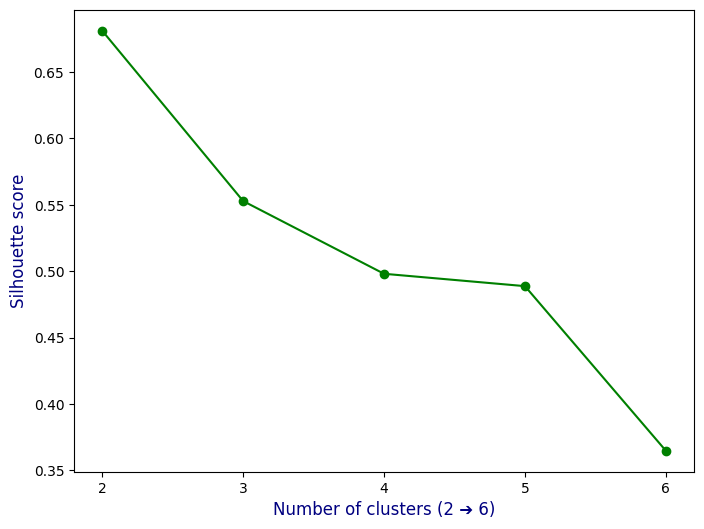

In [25]:
# Select the optimal number of clusters : Silhouette score
silhouette_scores = []

for i in range(2,7):
    km = KMeans(n_clusters=i, n_init=10)
    labels = km.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))
    
fig = plt.figure(figsize=(8,6))

plt.plot([i for i in range(2, 7)], silhouette_scores, color='green', marker="o")

plt.xlabel("Number of clusters (2 ➔ 6)", color='navy', fontsize=12)
plt.ylabel("Silhouette score", color='navy', fontsize=12)

plt.xticks(list(range(2, 7)))

plt.show()

We want to maximize the Silhouette score. So the optimal number of clusters is 2.

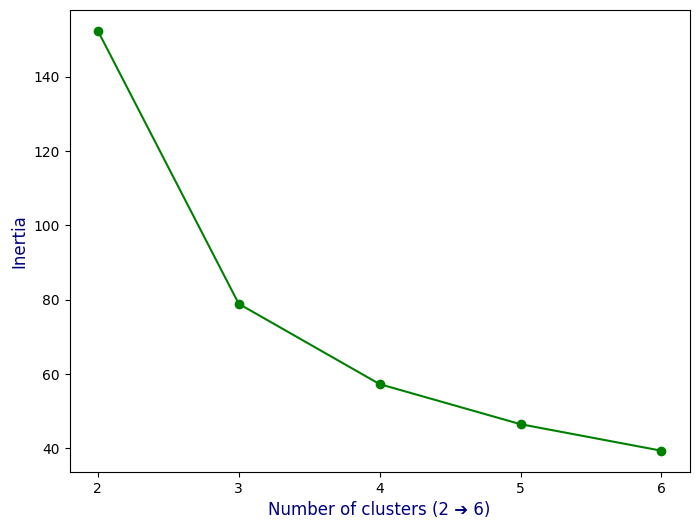

In [26]:
# Select the optimal number of clusters : Elbow method
Inertia = []

for i in range(2,7):
    km = KMeans(n_clusters=i, n_init=10)
    km.fit(X)
    Inertia.append(km.inertia_)
    
fig = plt.figure(figsize=(8,6))

plt.plot([i for i in range(2, 7)], Inertia, color='green', marker="o")

plt.xlabel("Number of clusters (2 ➔ 6)", color='navy', fontsize=12)
plt.ylabel("Inertia", color='navy', fontsize=12)

plt.xticks(list(range(2, 7)))

plt.show()

The optimal number of clusters is 3 (Elbow).

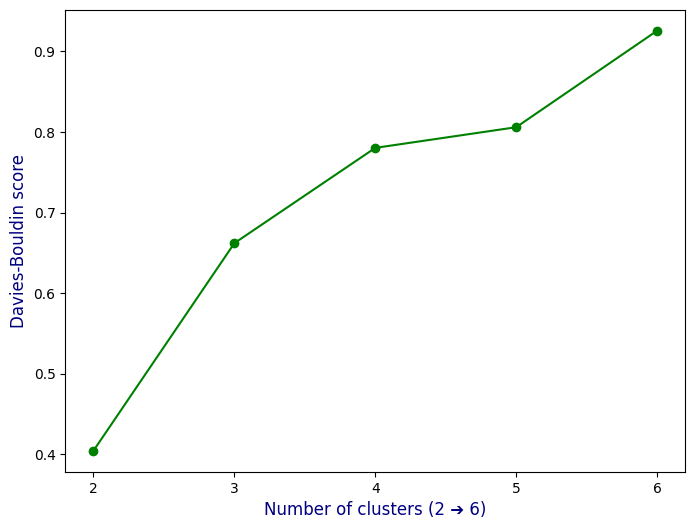

In [27]:
# Select the optimal number of clusters : Davies-Bouldin score
davies_bouldin_scores = []

for i in range(2,7):
    km = KMeans(n_clusters=i, n_init=10)
    labels = km.fit_predict(X)
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))
    
fig = plt.figure(figsize=(8,6))

plt.plot([i for i in range(2, 7)], davies_bouldin_scores, color='green', marker="o")

plt.xlabel("Number of clusters (2 ➔ 6)", color='navy', fontsize=12)
plt.ylabel("Davies-Bouldin score", color='navy', fontsize=12)

plt.xticks(list(range(2, 7)))

plt.show()

We want to minimize the Davies Bouldin score. So the optimal number of clusters is 2.

## Contingency matrix

We now use the ground-truth labels. First, we compute and display the contingency matrix.

In [28]:
n_clusters = 3
km = KMeans(n_clusters, n_init=10)
labels = km.fit_predict(X)

In [29]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [30]:
# Reorder the labels
cm = contingency_matrix(y, labels)
cm_argmax = cm.argmax(axis=0)
labels = np.array([cm_argmax[i] for i in labels])

In [31]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [32]:
contingency = contingency_matrix(y, labels)

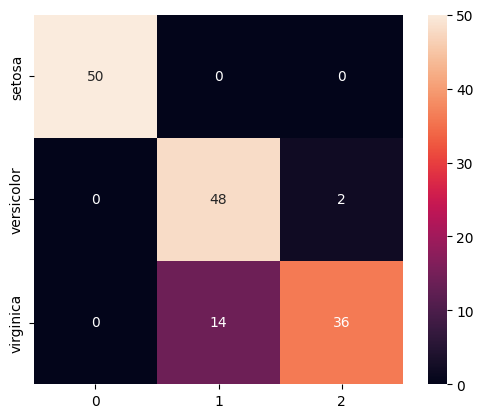

In [33]:
sns.heatmap(contingency, annot=True, square=True, xticklabels=np.arange(n_clusters), yticklabels=label_names);

## Metrics

Second, we use the metrics (ARI and AMI) to find the optimal number of clusters.

## To do

* Plot the ARI and AMI scores with respect to the number of clusters.
* What is the optimal number of clusters?

In [34]:
# Precision, Recall, F1-score
metrics = precision_recall_fscore_support(y, labels, warn_for=tuple())
list_metrics = ['Precision', 'Recall', 'F1-score', 'Support']

print(tabulate([[list_metrics[i], metrics[i][0], metrics[i][1], metrics[i][2]] for i in range(4)], 
               headers=['Métrique','Classe 0','Classe 1', 'Classe 2']))

Métrique      Classe 0    Classe 1    Classe 2
----------  ----------  ----------  ----------
Precision            1    0.774194    0.947368
Recall               1    0.96        0.72
F1-score             1    0.857143    0.818182
Support             50   50          50


In [35]:
print("Average F1-score : ", f1_score(y, labels, average='macro'))

Average F1-score :  0.8917748917748919


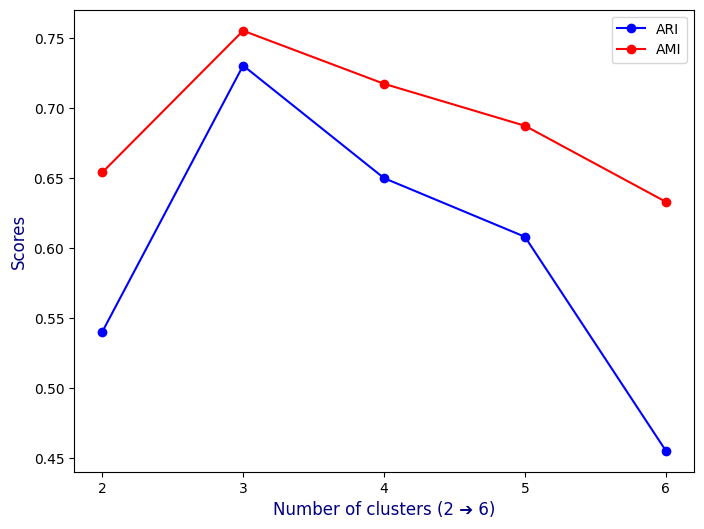

In [36]:
# Select the optimal number of clusters : ARI, AMI
ARI = []
AMI = []

for i in range(2,7):
    km = KMeans(n_clusters=i, n_init=10)
    labels = km.fit_predict(X)
    ARI.append(adjusted_rand_score(y, labels))
    AMI.append(adjusted_mutual_info_score(y, labels))
    
fig = plt.figure(figsize=(8,6))

plt.plot([i for i in range(2, 7)], ARI, color='blue', marker="o", label='ARI')
plt.plot([i for i in range(2, 7)], AMI, color='red', marker="o", label='AMI')

plt.xlabel("Number of clusters (2 ➔ 6)", color='navy', fontsize=12)
plt.ylabel("Scores", color='navy', fontsize=12)

plt.xticks(list(range(2, 7)))

plt.legend()

plt.show()

The optimal number of clusters is 3.